# Exploratory Analysis For Automobiles

In [62]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv("Automobile_data.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [55]:
df.count().unique()

array([164, 205, 203, 201], dtype=int64)

In [29]:
df = df.replace('?', np.NAN)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [59]:
df.head()

df['make'].value_counts().head()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
Name: make, dtype: int64

<AxesSubplot:>

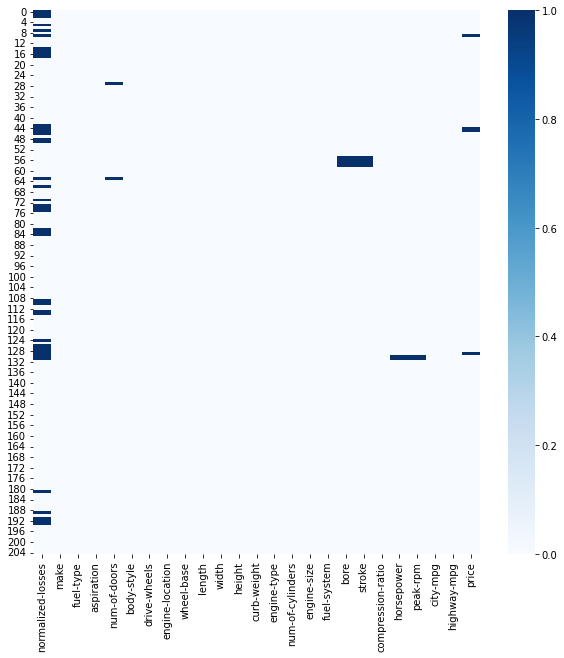

In [73]:

plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cmap='Blues')

array([[<AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>],
       [<AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

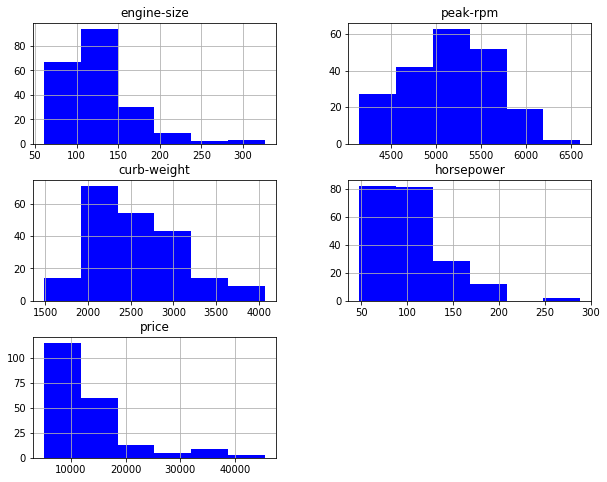

In [139]:
df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='blue')

In [89]:
cols = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in cols:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


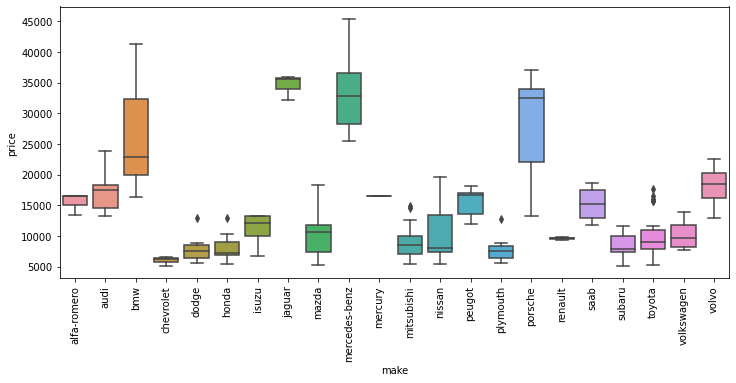

In [101]:
plt.figure(figsize = (12,5))

sns.boxplot(x='make',y='price',data=df)
plt.xticks(rotation = 90)
plt.show()

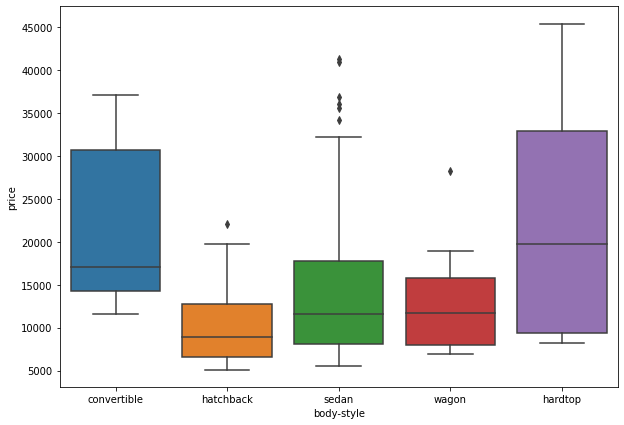

In [141]:
plt.rcParams['figure.figsize']=(10,7)
ax = sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='price', ylabel='engine-location'>

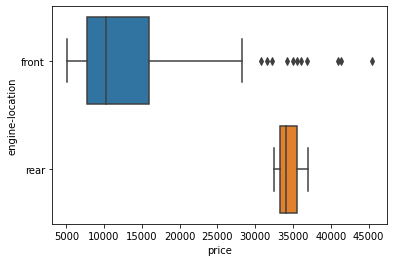

In [108]:
sns.boxplot(x = 'price', y = 'engine-location', data=df)


<AxesSubplot:xlabel='price', ylabel='fuel-type'>

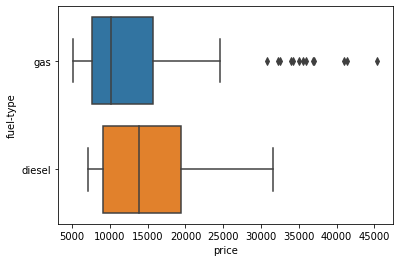

In [114]:
sns.boxplot(x = 'price', y = 'fuel-type', data=df)

In [117]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

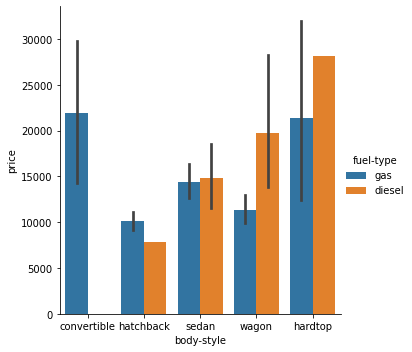

In [161]:
sns.catplot(data=df, x="body-style", y="price", hue="fuel-type", kind= 'bar' )


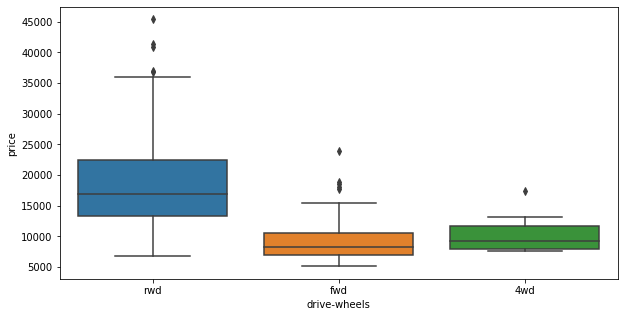

In [162]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='horsepower'>

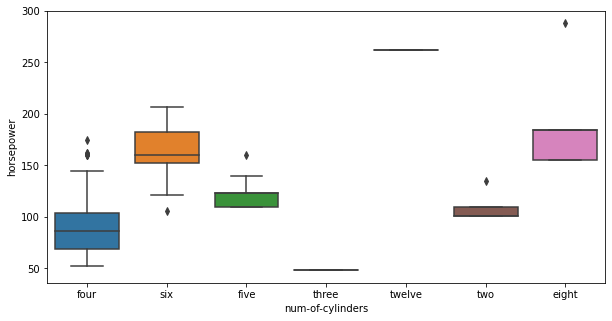

In [172]:
sns.boxplot(x='num-of-cylinders' , y = 'horsepower' , data=df)

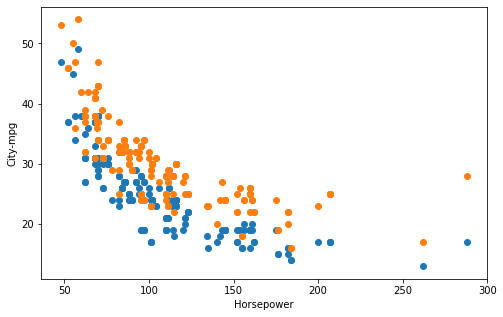

In [121]:
plt.figure(figsize=(8, 5))
plt.scatter(x='horsepower',y='city-mpg',data=df)
plt.scatter(x='horsepower',y='highway-mpg',data=df)
plt.xlabel('Horsepower')
plt.ylabel('City-mpg')

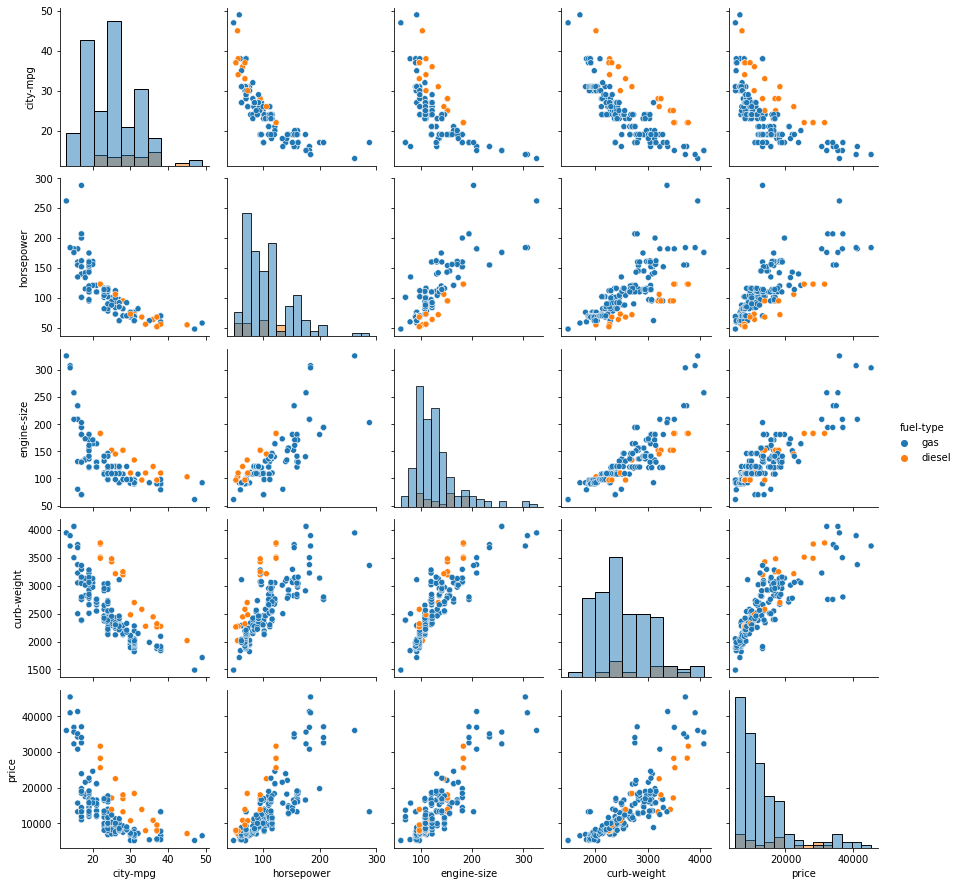

In [122]:
sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight", "fuel-type", "price"]], hue="fuel-type", diag_kind="hist")

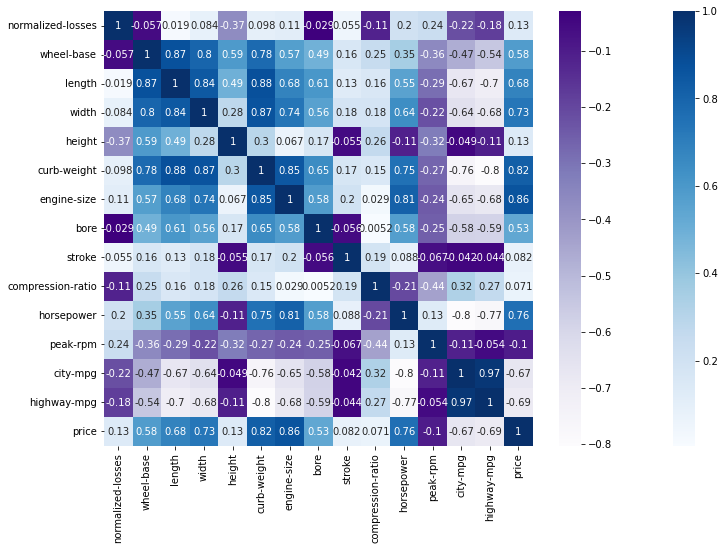

In [133]:
plt.figure(figsize = (12,8))

sns.heatmap(df.corr(),annot = True, cmap='Blues', mask = (df.corr() <= 0 ))
sns.heatmap(df.corr(),annot = True, cmap='Purples', mask = (df.corr() >= 0 ))

plt.show()

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

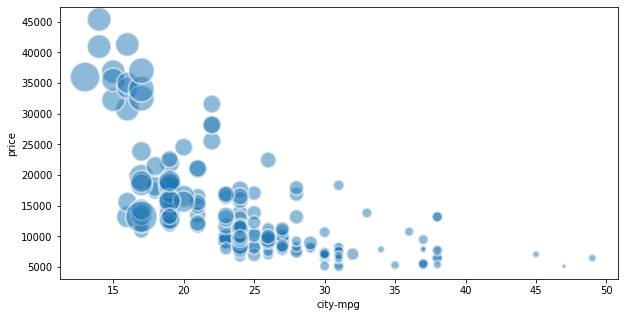

In [187]:
df.columns
sns.scatterplot(data=df , x = "city-mpg" , y="price" , size = "horsepower" ,legend=False, sizes=(20,1000),cmap="Blues", alpha=0.5, edgecolors="grey", linewidth=2)